In [1]:
#Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Load Comcast Data

In [2]:
comcast_df = pd.read_csv('./Comcast_telecom_complaints_data.csv')

#### Data Info

In [3]:
comcast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
comcast_df.shape

(2224, 11)

In [5]:
#top 5 data samples
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


## Task 1 :
Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [6]:
#setting attribute 'Date_month_year' as index.
comcast_df['Date_month_year'] = comcast_df['Date_month_year'].apply(pd.to_datetime)
date_index_df = comcast_df.set_index('Date_month_year')

In [7]:
date_index_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2224 entries, 2015-04-22 to 2015-06-24
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


Text(0.5, 1.0, 'MONTHLY TREND CHART')

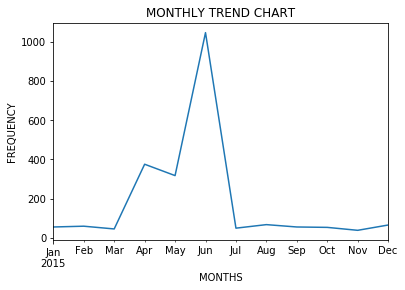

In [8]:
month = date_index_df.groupby(pd.Grouper(freq='M')).size().plot()
plt.xlabel('MONTHS')
plt.ylabel('FREQUENCY')
plt.title('MONTHLY TREND CHART')

In [35]:
month.savefig('monthly_comp_trend_chart.png')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [10]:
comcast_df.sort_values(by='Date', inplace=True)

In [11]:
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
71,211976,Fraudulent claims reported to collections agency,04-01-15,2015-01-04,1:26:53 PM,Customer Care Call,Atlanta,Georgia,30312,Closed,No
2144,211677,Comcast refusal of service,04-01-15,2015-01-04,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No
717,212507,Comcast Cable,04-01-15,2015-01-04,3:54:43 PM,Internet,Franklin,Tennessee,37067,Closed,No
1839,213120,Data Overages,04-01-15,2015-01-04,8:05:57 PM,Internet,Savannah,Georgia,31406,Closed,No
1430,211478,Comcast,04-01-15,2015-01-04,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No


Text(0.5, 1.0, 'DAILY TREND CHART')

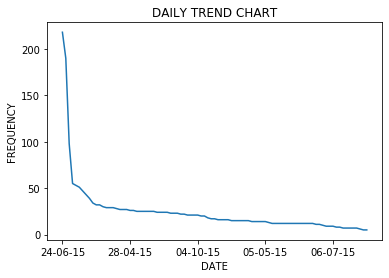

In [12]:
comcast_df['Date'].value_counts().plot()
plt.xlabel('DATE')
plt.ylabel('FREQUENCY')
plt.title('DAILY TREND CHART')

In [13]:
plt.savefig('daily_comp_trend_chart.png')

<Figure size 432x288 with 0 Axes>

## Task 2 : 
Provide a table with the frequency of complaint types.

In [14]:
comcast_df['Customer Complaint'].value_counts()[:10]

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Data Caps                   11
Comcast Billing             11
Comcast Data Caps           11
Unfair Billing Practices     9
Internet speed               8
Comcast data cap             8
Name: Customer Complaint, dtype: int64

In [15]:
len(comcast_df['Customer Complaint'].value_counts())

1841

In [16]:
complaint_types_table = {}

In [17]:
internet_issues = comcast_df[comcast_df['Customer Complaint'].str.contains('speed')].count() + \
                  comcast_df[comcast_df['Customer Complaint'].str.contains('data')].count() + \
                  comcast_df[comcast_df['Customer Complaint'].str.contains('internet')].count() + \
                  comcast_df[comcast_df['Customer Complaint'].str.contains('Throttling')].count()

complaint_types_table['internet'] = internet_issues['Customer Complaint']

In [18]:
network_issues = comcast_df[comcast_df['Customer Complaint'].str.contains('network')].count() + \
                 comcast_df[comcast_df['Customer Complaint'].str.contains('cable')].count()


complaint_types_table['network'] = network_issues['Customer Complaint']

In [19]:
billing_issues = comcast_df[comcast_df['Customer Complaint'].str.contains('billing')].count() + \
                 comcast_df[comcast_df['Customer Complaint'].str.contains('bill')].count() + \
                 comcast_df[comcast_df['Customer Complaint'].str.contains('charges')].count()

complaint_types_table['billing'] = billing_issues['Customer Complaint']

In [20]:
service_issues = comcast_df[comcast_df['Customer Complaint'].str.contains('service')].count() + \
                 comcast_df[comcast_df['Customer Complaint'].str.contains('customer')].count()

complaint_types_table['service'] = service_issues['Customer Complaint']

In [21]:
other_issues = comcast_df.shape[0] - (internet_issues + network_issues + billing_issues + service_issues)


complaint_types_table['other'] = other_issues['Customer Complaint']

In [22]:
complaint_types_table

{'internet': 408, 'network': 30, 'billing': 353, 'service': 360, 'other': 1073}

## Task 3 : 
Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [23]:
comcast_df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [24]:
comcast_df['newStatus'] = ['Open' if status=='Open' or status=='Pending' else 'Closed' for status in comcast_df['Status']]

In [25]:
comcast_df['newStatus'].unique()

array(['Closed', 'Open'], dtype=object)

In [26]:
comcast_df.sample(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,newStatus
1531,338830,Metered bandwidth with no data meter,13-06-15,2015-06-13,10:52:24 AM,Internet,Petal,Mississippi,39465,Solved,No,Closed
2174,282585,Comcast will not help us please help,05-10-15,2015-10-05,4:29:55 PM,Customer Care Call,Wheaton,Illinois,26104,Solved,No,Closed
1131,360791,Unfair pricing,24-06-15,2015-06-24,3:06:22 AM,Internet,Lehigh Acres,Florida,33936,Open,Yes,Open
101,323473,Comcast download caps,06-04-15,2015-04-06,2:18:03 PM,Internet,Atlanta,Georgia,30345,Solved,No,Closed
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,Open
1690,288793,internet and customer service problem with Com...,13-05-15,2015-05-13,8:12:53 PM,Internet,Rochester Hills,Michigan,48309,Solved,No,Closed
620,260681,comcast of indiana,28-04-15,2015-04-28,8:43:37 AM,Internet,Dyer,Indiana,46311,Closed,No,Closed
310,358669,comcast billing practices-unfair,23-06-15,2015-06-23,2:30:03 PM,Customer Care Call,Buford,Georgia,30519,Pending,No,Open
2199,302816,charged for no seevice,22-05-15,2015-05-22,7:17:11 AM,Customer Care Call,Woodridge,Illinois,60517,Closed,No,Closed
396,266647,Wireless Signal issues/frequent connection drop,30-04-15,2015-04-30,2:33:37 PM,Internet,Chicago,Illinois,60630,Closed,No,Closed


### Task 4 : 
Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. 


In [27]:
stateWise_complaints = comcast_df.groupby(['State', 'newStatus']).size().unstack()

In [28]:
stateWise_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


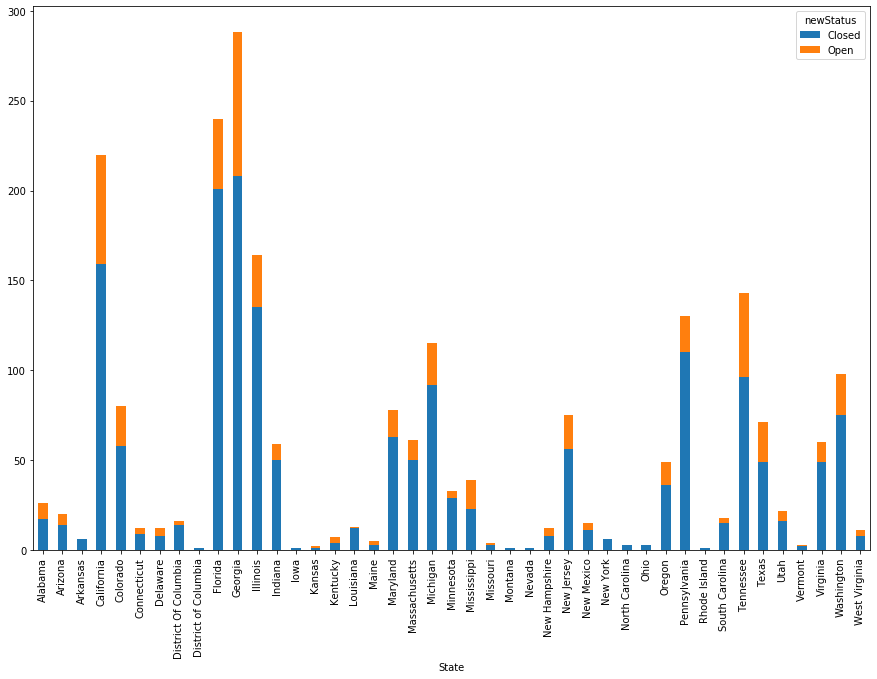

In [29]:
stateWise_complaints.plot.bar(figsize=(15,10), stacked=True)

In [30]:
plt.savefig('statewise_complaints.png')

<Figure size 432x288 with 0 Axes>

### Task 5 : 
    Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [31]:
resolved_data = comcast_df.groupby(['Received Via', 'newStatus']).size().unstack().fillna(0)

In [32]:
resolved_data

newStatus,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [33]:
resolved_data['resolved_%'] = resolved_data['Closed']/resolved_data['Closed'].sum()*100

In [34]:
resolved_data

newStatus,Closed,Open,resolved_%
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886
